<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 6 - Modelo NNAR</h3>
    <h3>Ejercicio 1_Sincronico</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno, Drago Braian <p>
</div>

**Neural network autoregression**  

Con datos de series de tiempo, los valores rezagados de la serie de tiempo se pueden usar como entradas para una red neuronal, tal como usamos valores rezagados en un modelo de autorregresión lineal. A esto lo llamamos autorregresión de red neuronal o modelo NNAR.

https://search.r-project.org/CRAN/refmans/forecast/html/nnetar.html

**Objetivo del Ejercicio**: Predecir, utilizando NNAR la tasa de desempleo de Mar del Plata.

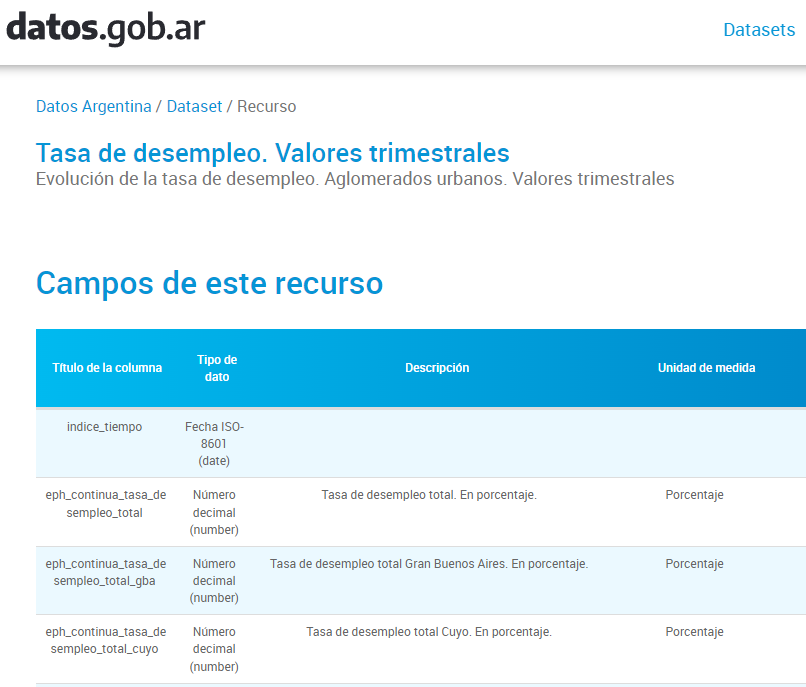

**Montaje de Drive personal para acceder a archivos/ datasets**

In [ ]:
# Load R
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

In [ ]:
%%R
install.packages('fpp2')
install.packages('ggplot2')
install.packages('forecast')
install.packages('RCurl')

In [ ]:
%%R
install.packages('readr')
install.packages('tidyr')
install.packages('zoo')

In [ ]:
%%R
suppressPackageStartupMessages({
  library(fpp2)
  library(ggplot2)
  library(forecast)
  library(readr)
  library(tidyr)
  library(ggplot2)
  library('dplyr')
  library(data.table)
  library(zoo)
  })

In [ ]:
%%R
install.packages('fpp2')

In [ ]:
%%R
suppressPackageStartupMessages({
  library(fpp2)
  library(ggplot2)
  library(forecast)
})

In [ ]:
%%R
library(fpp2)

In [ ]:
%%R
install.packages('zoo')

In [ ]:
%%R
url= 'https://raw.githubusercontent.com/braiandrago/AST/main/tasa-desempleo-valores-trimestrales.csv'
desempleo <- read.csv(file = url,
                    sep = ",",
                    header = T)

In [ ]:
%%R
desempleo2 <- desempleo %>% select('indice_tiempo','eph_continua_tasa_desempleo_total_mar_del_plata')

In [ ]:
%%R
desempleo2

   indice_tiempo eph_continua_tasa_desempleo_total_mar_del_plata
1     2003-01-01                                      0.18100000
2     2003-04-01                                      0.16500000
3     2003-07-01                                      0.17037256
4     2003-10-01                                      0.16102019
5     2004-01-01                                      0.13136115
6     2004-04-01                                      0.13803475
7     2004-07-01                                      0.12029364
8     2004-10-01                                      0.13393436
9     2005-01-01                                      0.12171828
10    2005-04-01                                      0.12741277
11    2005-07-01                                      0.13088522
12    2005-10-01                                      0.11941111
13    2006-01-01                                      0.10433912
14    2006-04-01                                      0.11704164
15    2006-07-01         

In [ ]:
%%R
desempleo2 <- na.locf(desempleo2, fromLast = TRUE) #reemplazamos Nas con el último valor observado disponible.

In [ ]:
#Configurar la/s variables de interes como serie/s de tiempo"
%%R
desempleo_ts <- ts(desempleo2$eph_continua_tasa_desempleo_total_mar_del_plata,
               start = c(2003,01),  #configuración del inicio
               frequency = 4) #configuración de la frecuencia

In [ ]:
%%R
desempleo_ts

           Qtr1       Qtr2       Qtr3       Qtr4
2003 0.18100000 0.16500000 0.17037256 0.16102019
2004 0.13136115 0.13803475 0.12029364 0.13393436
2005 0.12171828 0.12741277 0.13088522 0.11941111
2006 0.10433912 0.11704164 0.11452838 0.06743282
2007 0.09029322 0.11125346 0.10762081 0.10762081
2008 0.07563894 0.10560114 0.09602575 0.10124049
2009 0.08615907 0.14489799 0.11635623 0.09158609
2010 0.08500000 0.08300000 0.08000000 0.08700000
2011 0.07800000 0.11000000 0.09300000 0.07700000
2012 0.08100000 0.09900000 0.08300000 0.09500000
2013 0.09000000 0.09100000 0.11000000 0.11700000
2014 0.09000000 0.10300000 0.08900000 0.10900000
2015 0.10300000 0.08100000 0.11800000 0.11600000
2016 0.11600000 0.11600000 0.12100000 0.10600000
2017 0.10400000 0.11900000 0.09000000 0.09300000
2018 0.08500000 0.08200000 0.11800000 0.12800000
2019 0.10100000 0.13400000 0.10200000 0.11100000
2020 0.10400000 0.26000000 0.13100000 0.11091002
2021 0.09400000 0.11624993 0.10400000 0.08400000
2022 0.05800000 0.08

Procedemos a visualizar la serie: (hay distintas formas....)

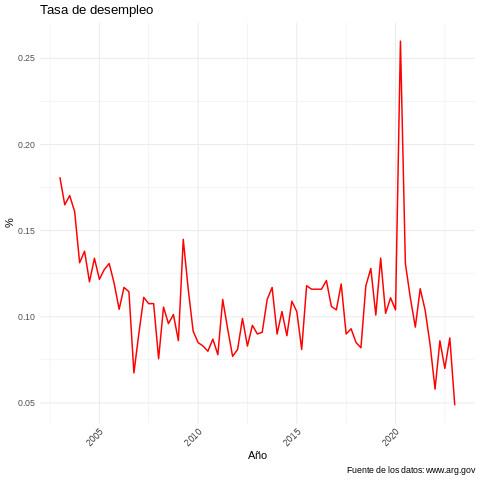

In [ ]:
%%R
time3<-as.Date(desempleo2$indice_tiempo, format = "%Y-%m-%d")

g3<-ggplot(desempleo2,aes(x=time3))+
  geom_line(aes(y= eph_continua_tasa_desempleo_total_mar_del_plata), color = "red", size = 0.7)+
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 9))+
  labs(caption = "Fuente de los datos: www.arg.gov")+
  ylab("%") +
  xlab("Año") +
  ggtitle("Tasa de desempleo")
g3

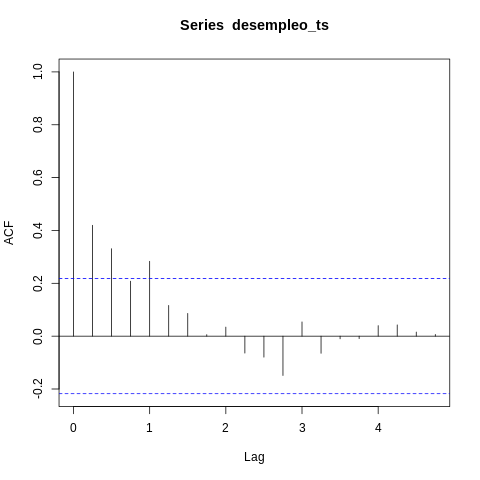

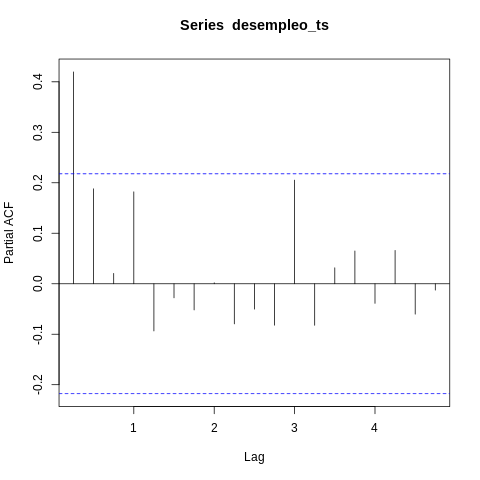

In [ ]:
%%R
acf(desempleo_ts)
pacf(desempleo_ts)

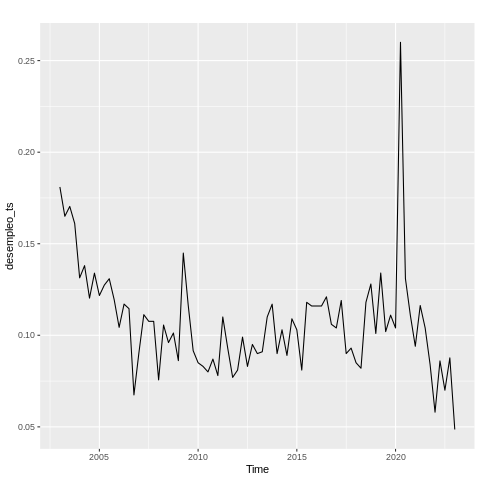

In [ ]:
#grafico
%%R
autoplot(desempleo_ts)

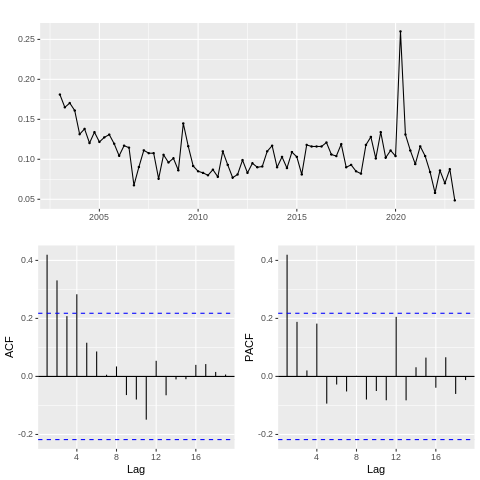

In [ ]:
## GRÁFICO DE LA SERIE, FAC Y FACP
%%R
ggtsdisplay(desempleo_ts)

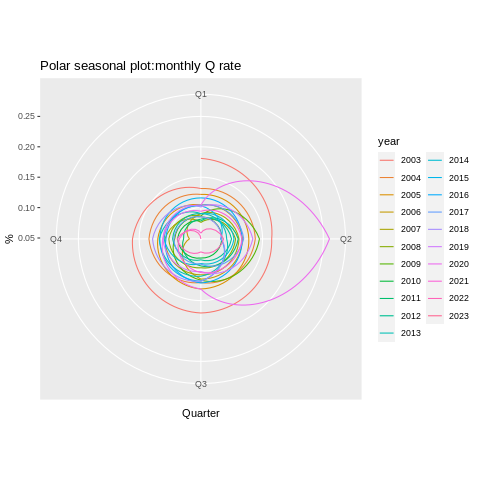

In [ ]:
# Polar seasonal plot
%%R
ggseasonplot(desempleo_ts, polar=TRUE) +
  ylab("%") +
  ggtitle("Polar seasonal plot:monthly Q rate ")

In [ ]:
# Splitting the data intro training and test sets
%%R
training <- window(desempleo_ts, start=2003, end=c(2017,4))
test <- window(desempleo_ts, start=2018, end=c(2023,01))

In [ ]:
%%R
training

           Qtr1       Qtr2       Qtr3       Qtr4
2003 0.18100000 0.16500000 0.17037256 0.16102019
2004 0.13136115 0.13803475 0.12029364 0.13393436
2005 0.12171828 0.12741277 0.13088522 0.11941111
2006 0.10433912 0.11704164 0.11452838 0.06743282
2007 0.09029322 0.11125346 0.10762081 0.10762081
2008 0.07563894 0.10560114 0.09602575 0.10124049
2009 0.08615907 0.14489799 0.11635623 0.09158609
2010 0.08500000 0.08300000 0.08000000 0.08700000
2011 0.07800000 0.11000000 0.09300000 0.07700000
2012 0.08100000 0.09900000 0.08300000 0.09500000
2013 0.09000000 0.09100000 0.11000000 0.11700000
2014 0.09000000 0.10300000 0.08900000 0.10900000
2015 0.10300000 0.08100000 0.11800000 0.11600000
2016 0.11600000 0.11600000 0.12100000 0.10600000
2017 0.10400000 0.11900000 0.09000000 0.09300000


In [ ]:
%%R
test

           Qtr1       Qtr2       Qtr3       Qtr4
2018 0.08500000 0.08200000 0.11800000 0.12800000
2019 0.10100000 0.13400000 0.10200000 0.11100000
2020 0.10400000 0.26000000 0.13100000 0.11091002
2021 0.09400000 0.11624993 0.10400000 0.08400000
2022 0.05800000 0.08600000 0.07000000 0.08766626
2023 0.04855043                                 


La función nnetar en el paquete de pronóstico para R ajusta un modelo de red neuronal a una serie temporal utilizando valores rezagados de la misma como inputs (y podria utilizar otros inputs exógenos)."

p: Number of non-seasonal lags used as inputs  
size: Number of nodes in the hidden layer.  
repeat: Number of networks to fit with different random starting weights. These are then averaged when producing forecasts.  
xreg: Optionally, a vector or matrix of external regressors, which must have the same number of rows as y. Must be numeric.

**nnetar**(y, p, P, size, repeats = 20, xreg = NULL, scale.inputs = TRUE, x = y, …)

In [ ]:
## ENTRENAR MODELO NNAR
%%R
nn1 = nnetar(y = training,
             p = 4,
             P = 0,
             size = 3,
             )

In [ ]:
## VER ESTRUCTURA DE LOS DATOS
%%R
print(nn1)

Series: training 
Model:  NNAR(4,3) 
Call:   nnetar(y = training, p = 4, P = 0, size = 3)

Average of 20 networks, each of which is
a 4-3-1 network with 19 weights
options were - linear output units 

sigma^2 estimated as 8.403e-05



	Ljung-Box test

data:  Residuals from NNAR(4,3)
Q* = 5.1546, df = 8, p-value = 0.7409

Model df: 0.   Total lags used: 8



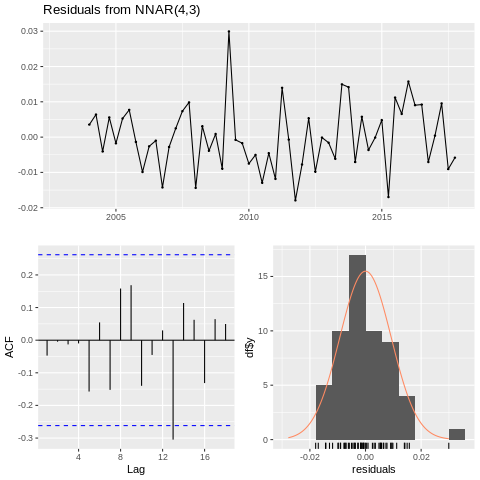

In [ ]:
## CHEQUEAR ESTRUCTURA DE LOS RESIDUOS DEL MODELO
%%R
checkresiduals(nn1)

**Prueba de Autocorrelación Serial de Ljung Box**

In [ ]:
%%R
h<-c(1:length(training)-1)
for (i in 1:length(training)-1) {
  Q=Box.test(nn1$residuals, lag=i, type='Ljung-Box')
  h[i]<-Q$p.value
}
head(h)

[1] 0.7164669 0.9355963 0.9861674 0.9973441 0.8852674 0.9267639



h: Number of periods for forecasting. If xreg is used, h is ignored and the number of forecast periods is set to the number of rows of xreg.

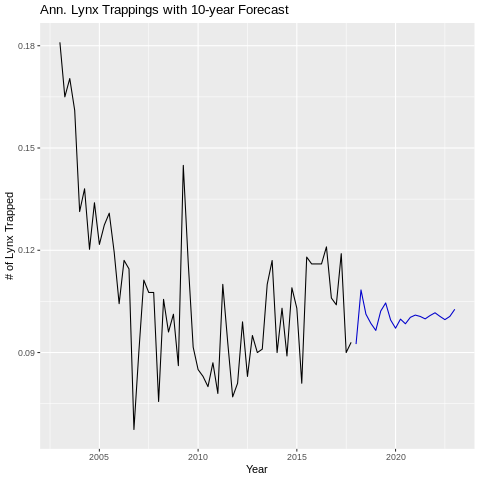

In [ ]:
%%R
fc1 = forecast(nn1, h = 21)
autoplot(fc1) +
  xlab("Year") +
  ylab("# of Lynx Trapped") +
  ggtitle("Ann. Lynx Trappings with 10-year Forecast")

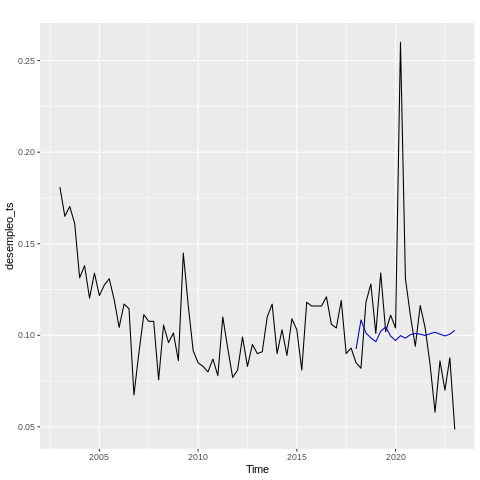

In [ ]:
## GRAFICO DE LA SERIE ORIGINAL Y EL MODELO AJUSTADO
%%R
autoplot(desempleo_ts) +
  autolayer(fc1)

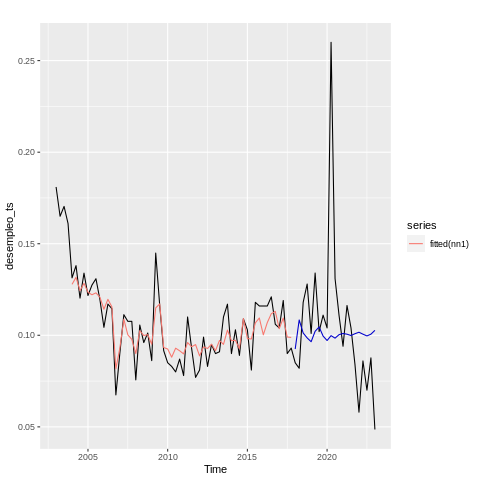

In [ ]:
%%R
autoplot(desempleo_ts) +
  autolayer(fitted(nn1)) +
  autolayer(fc1)

In [ ]:
## EVALUAR LA PERFORMANCE DEL MODELO CON LOS DATOS DE TESTING
%%R
accuracy(fc1,test)

                        ME        RMSE        MAE       MPE      MAPE      MASE
Training set -4.489137e-06 0.009166519 0.00725067 -1.240854  7.343588 0.4137976
Test set      5.174206e-03 0.041772866 0.02567567 -6.483308 25.124993 1.4653167
                    ACF1 Theil's U
Training set -0.04726078        NA
Test set      0.24796354  0.992557


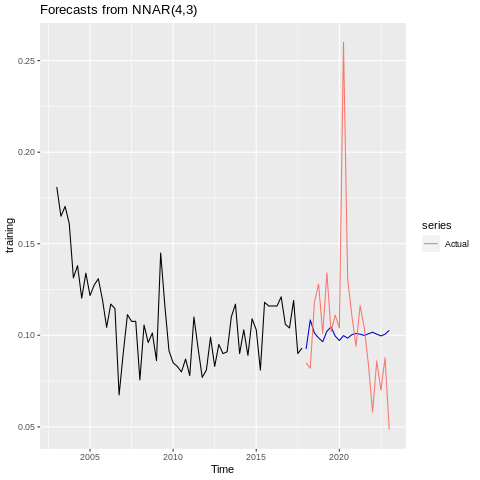

In [ ]:
## GRAFICAR LA SERIE Y LAS PREDICCIONES SOBRE EL CONJUNTO DE DATOS DE TESTING
%%R
autoplot(fc1) +
  autolayer(test,series="Actual")

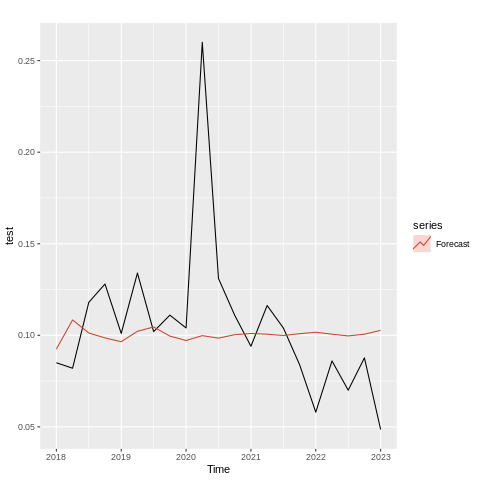

In [ ]:
## GRAFICAR LOS DATOS REALES DEL CONJUNTO DE TESTING CON LAS PREDICCIONES
%%R
autoplot(test) +
  autolayer(fc1,series="Forecast")